In [2]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

matrix: 
 [[14  0  0]
 [ 1 15  0]
 [ 0  0  6]] 
 accuracy: 0.9722222222222222


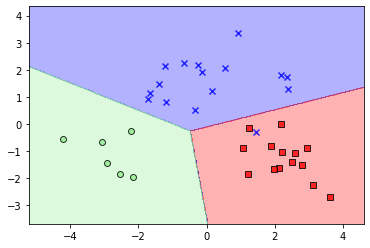

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap 
dataset = pd.read_csv('Wine.csv')

x = dataset.iloc[:,0:13].values
y = dataset.iloc[:,13].values

x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size = 0.2,random_state = 0)

sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

pca = PCA(n_components=2)#<<<<<<<<<<<<<<<<<<<<<<<<<＝ x>0.5
                                                   #||
x_train= pca.fit_transform(x_train)        #||
x_test= pca.transform(x_test) 
                                                  #||



lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
print('matrix:','\n',cm,'\n','accuracy:',acc)

plot_decision_regions(x_test,y_test,lr)

In [5]:
a = pca.explained_variance_ratio_

In [6]:
a

array([0.36884109, 0.19318394])